{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Clip a spatial vector point and line layer to the spatial extent of a polygon layer in **Python** using **geopandas**.
* Plot data with custom legends.

</div>


## How to Clip Vector Data in Python


### What Is Clipping or Cropping Data?
When you clip or crop spatial data you are removing the data outside of the clip extent. 
This means that your clipped dataset will be SMALLER (have a smaller spatial extent) than the original dataset.
This also means that objects in the data such as polygons or lines will be CUT based on the boundary of the clip object.

<figure>
    <a href="{{ site.baseurl }}/images/earth-analytics/spatial-data/spatial-extent.png">
    <img src="{{ site.baseurl }}/images/earth-analytics/spatial-data/spatial-extent.png" alt="the spatial extent represents the spatial area that a particular dataset covers."></a>
    <figcaption>The spatial extent of a shapefile or `Python` spatial object like a `geopandas` `geodataframe` represents
    the geographic "edge" or location that is the furthest north, south east and
    west. Thus is represents the overall geographic coverage of the spatial object.
    Image Source: National Ecological Observatory Network (NEON)
    </figcaption>
</figure>

### When Do You Want to Clip Data?
You may want to clip your data for several reasons:

1. You have more data than you need. For example you have data outside of your study area that you don't need to process. Clipping it to the study area boundary will make it smaller and easier to manage!
2. If you have data outside of your study area and you clip it, you can perform analysis on only that region - thus you won't need to subset the data further when you perform summary statistics for example.
3. When you plot the data  you will only see the study region.

You will learn how to both crop your data and zoom in on an extent below.  
Get started by loading your libraries. And be sure that your working directory is set. 

In this lesson you will find examples of how to clip point and line data using geopandas. At the bottom of the lesson you will see a set of functions that can be used to clip the data in just one line of code. This lesson explains how those functions are built. 

In [1]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd

# Load the box module from shapely to create box objects
from shapely.geometry import box
import earthpy as et
import seaborn as sns

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

## How to Clip Shapefiles in Python

In your dataset for this week you have 3 layers:

1. A country boundary for the USA and
2. A state boundary layer for the USA and 
3. Populated places in the USA

The data are imported and plotted below. Notice that there are points outside of your study area which is the continental USA. Your goal is the clip the points out that you NEED for your project - the points that overlay on top of the continental United States.

In [2]:
# Import all of your data at the top of your notebook to keep things organized.
country_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                        "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(country_boundary_us_path)

state_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

pop_places_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_populated_places_simple", "ne_110m_populated_places_simple.shp")
pop_places = gpd.read_file(pop_places_path)

# Are the data all in the same crs?
print("country_boundary_us", country_boundary_us.crs)
print("state_boundary_us", state_boundary_us.crs)
print("pop_places", pop_places.crs)

country_boundary_us epsg:4326
state_boundary_us epsg:4326
pop_places epsg:4326


In [3]:
#!conda info --envs

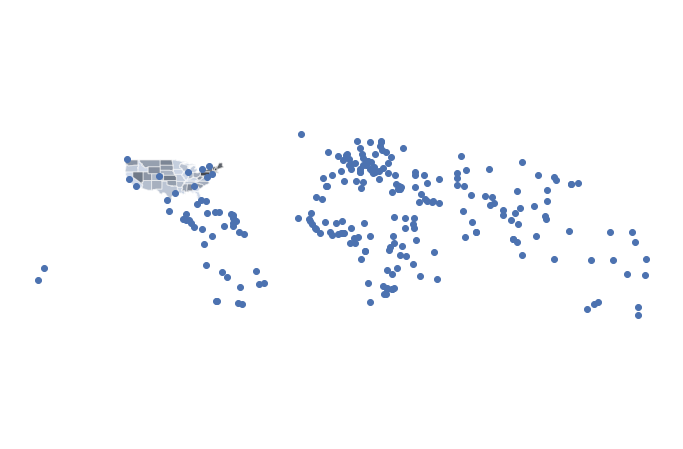

In [4]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=.5,
                         ax=ax)

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)
pop_places.plot(ax=ax)

plt.axis('equal')
ax.set_axis_off()
plt.show()

## Clip The Points Shapefile in Python Using Geopandas

To remove the points that are outside of your study area, you can clip the data. Removing or clipping data can make the data smaller and inturn plotting and analysis faster. 

<figure>
    <a href="{{ site.url }}/images/earth-analytics/spatial-data/vector-clip.png">
    <img src="{{ site.url }}/images/earth-analytics/spatial-data/vector-clip.png" alt="Clip vector data."></a>
    <figcaption> When you clip a vector data set with another layer, you remove points, lines or polygons that are outside of the spatial extent of the area that you use to clip the data. This images shows a circular clip region - you will be using a rectangular region in this example. Image Source: ESRI
    </figcaption>
</figure>

To clip points, lines, and polygons, GeoPandas has a function named `clip()` that will clip all types of geometries. This operation used to be much more difficult, involving creating bounding boxes and shapely objects, while using the GeoPandas `intersection()` function to clip the data. However, to simplify the process EarthPy developed a `clip_shp()` function that would do all of these things automatically. The function was than picked up by GeoPandas and is now a part of their package! Just a small example of how awesome working with open source software can be.

`Clip()` takes three arguments:

* gdf: Vector layer (point, line, polygon) to be clipped to mask.
* mask: Polygon vector layer used to clip `gdf`. The mask's geometry is dissolved into one geometric feature and intersected with `gdf`.
* keep_geom_type: If True, return only geometries of original type in case of intersection resulting in multiple geometry types or GeometryCollections. If False, return all resulting geometries (potentially mixed-types). Default value is False (You don't need to worry about this argument for this assignment)

`clip()` will clip the data to the boundary of the polygon layer that you select. If there are multiple polygons in your clip_obj object, `clip()` will clip the data to the total boundary of all polygons in the layer.

In [5]:
# Clip the data using GeoPandas clip
points_clip = gpd.clip(pop_places, country_boundary_us)

# View the first 6 rows and a few select columns
points_clip[['name', 'geometry', 'scalerank', 'natscale', ]].head()

,name,geometry,scalerank,natscale
175,San Francisco,POINT (-122.41717 37.76920),1,300
176,Denver,POINT (-104.98596 39.74113),1,300
177,Houston,POINT (-95.34193 29.82192),1,300
178,Miami,POINT (-80.22605 25.78956),1,300
179,Atlanta,POINT (-84.40190 33.83196),1,300


Now you can plot the data to see the newly "clipped" points layer. 

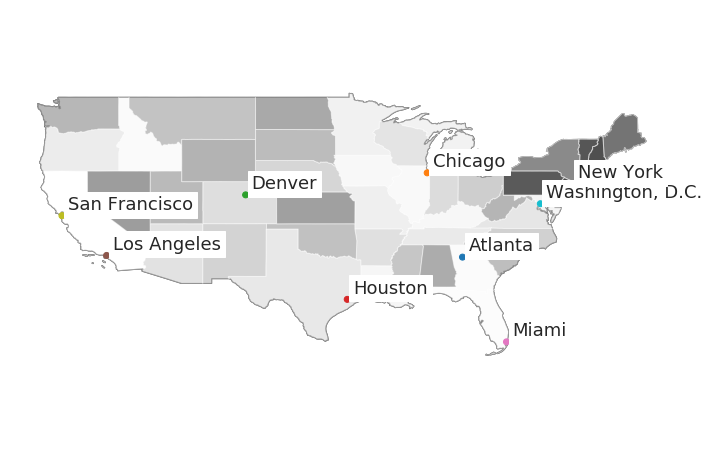

In [6]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

points_clip.plot(ax=ax,
                 column='name')
ax.set_axis_off()
plt.axis('equal')

# Label each point - note this is just shown here optionally but is not required for your homework
points_clip.apply(lambda x: ax.annotate(s=x['name'],
                                        xy=x.geometry.coords[0],
                                        xytext=(6, 6), textcoords="offset points",
                                        backgroundcolor="white"),
                  axis=1)
plt.show()

## Clip a Line or Polygon Layer to An Extent

The process for clipping a line or polygon layer is slightly different than clipping a set of points. To clip a line of polygon feature you will do the following:

1. Ensure that your polygon and line layer are in the same coordinate reference system
2. Identify what features in the lines layer fall WITHIN the boundary of the polygon layer
3. Subset the features within the geometry and reset the geometry of the newly clipped layer to be equal to the clipped data. 

This last step may seem unusual. When you clip data using shapely and geopandas the default behaviour is for it to only return the clipped geometry. However you may wish to also retain the attributes associated with the geometry. This is where the `set_geometry()` method comes into play.

For this example you will use the `country_boundary` layer and a clipped version of the natural earth 10m roads layer. * Import `ne_10m_n_america_roads.shp` into python. 
* Next, check to ensure that the roads and country boundary are in the same CRS. You may need to reproject the data.
* Because spatial operations take time, it's best if you subset your data as much as possible prior to clipping. 

In [7]:
# Open the roads layer
ne_roads_path = os.path.join("data", "spatial-vector-lidar", "global", 
                             "ne_10m_roads", "ne_10m_roads.shp")
ne_roads = gpd.read_file(ne_roads_path)

# Are both layers in the same CRS?
if (ne_roads.crs == country_boundary_us.crs):
    print("Both layers are in the same crs!",
          ne_roads.crs, country_boundary_us.crs)

Both layers are in the same crs! epsg:4326 epsg:4326


## How to Clip Lines and Polygons in Python

In your dataset for this week you have 2 layers.

1. A global, natural earth roads layer and
2. A boundary for the United States.

The roads data are imported below. You imported the boundary layer above.  

In [8]:
# just some notes on pandas operations - iloc vs loc --
# maybe this belongs in the first few weeks?
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
# sjer_roads.iloc[1]

If both layers are in the same CRS, you are ready to clip your data. Because the clip functions are new and little testing has been done with them, you will see all of the lines of code required to clip your data. However you can use the `clip_shp()` function to clip your data for this week's class! 

Be patient while your clip code below runs. 

In [9]:
#bbox = shp.geometry.apply(lambda x: x.bounds)

In [10]:
# %%time
# # Create a single polygon object for clipping
# poly = country_boundary_us_sim.geometry.unary_union
# spatial_index = shp.sindex

# # Create a box for the initial intersection
# bbox = poly.bounds

# # Get a list of id's for each road line that overlaps the bounding box and subset the data to just those lines
# # This makes the data that you are intersecting smaller and things run faster
# sidx = list(spatial_index.intersection(bbox))
# ne_roads_clip = ne_roads[ne_roads.index.isin(sidx)]
# clipped_roads = ne_roads_clip.copy()

# # Clip the data & remove null geometry values
# clipped_roads['geometry'] = ne_roads_clip.intersection(poly)
# clipped_roads = clipped_roads[clipped_roads.geometry.notnull()]

To make your code run faster, you can simplify the geometry of your country boundary. Simplify should be used with caution as it does modify your data.

In [11]:
# Simplify the geometry of the clip extent for faster processing
# Use this with caution as it modifies your data.
country_boundary_us_sim = country_boundary_us.simplify(
    .2, preserve_topology=True)

Clip and plot the data.

In [12]:
# Clip data
ne_roads_clip = gpd.clip(ne_roads, country_boundary_us_sim)

# Ignore missing/empty geometries
ne_roads_clip = ne_roads_clip[~ne_roads_clip.is_empty]

print("The clipped data have fewer line objects (represented by rows):",
      ne_roads_clip.shape, ne_roads.shape)

The clipped data have fewer line objects (represented by rows): (7346, 32) (56601, 32)


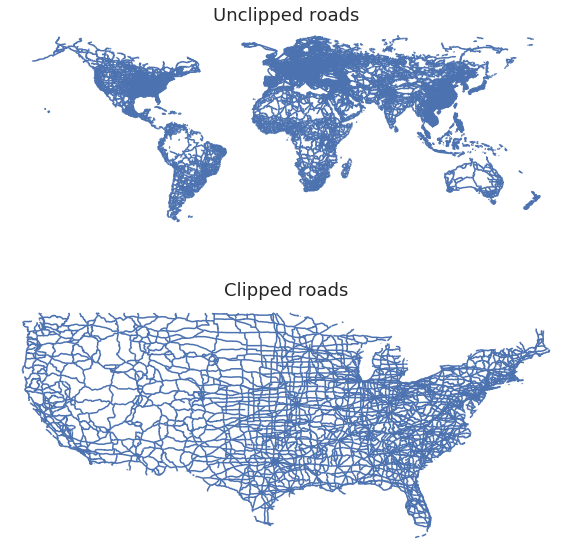

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ne_roads.plot(ax=ax1)
ne_roads_clip.plot(ax=ax2)

ax1.set_title("Unclipped roads")
ax2.set_title("Clipped roads")

ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()

In [14]:
# % % time -- should be able to delete this toon
# first simplify the clip geometry.
#country_boundary_us_sim = country_boundary_us.simplify(.3, preserve_topology=True)
#country_boundary_us_sim = country_boundary_us
# subset to just the NA continent
# na_roads = ne_roads[ne_roads['continent'] == "North America"]

# # clip the roads layer to the sjer extent object
# us_roads = na_roads.intersection(country_boundary_us_sim.geometry[0])
# # create boolean object for geometry that is not empty
# valid_geom = us_roads.geometry.notnull()
# # finally create a us roads only layer with updated, clipped geometry
# us_roads_only = na_roads.loc[valid_geom].set_geometry(
#     us_roads.geometry[valid_geom])

In [15]:
# start = time.time()
# # subset to just the NA continent
# na_roads = ne_roads[ne_roads['continent'] == "North America"]

# # clip the roads layer to the sjer extent object
# us_roads = na_roads.intersection(country_boundary_us.geometry[0])
# # create boolean object for geometry that is not empty
# valid_geom = us_roads.geometry.notnull()
# # finally create a us roads only layer with updated, clipped geometry
# us_roads_only = na_roads.loc[valid_geom].set_geometry(us_roads.geometry[valid_geom])
# end = time.time()
# print(end - start)
# ~77 secs

Plot the cropped data. 

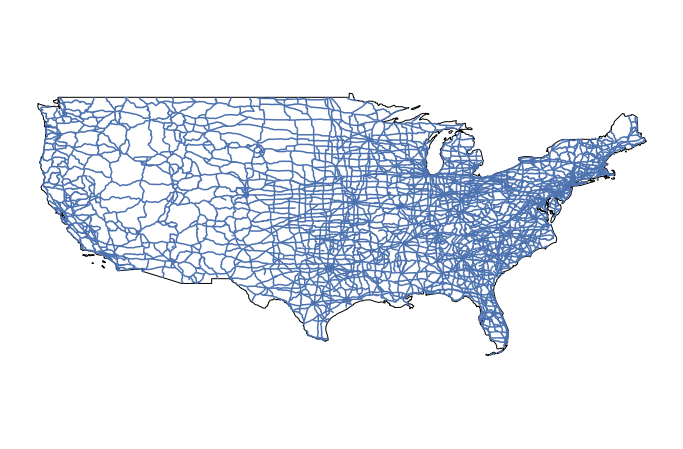

In [16]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

ne_roads_clip.plot(ax=ax)

ax.set_axis_off()
plt.axis('equal')
plt.show()

<div class="notice" markdown="1">
<i class="fa fa-star"></i>**How Clip() works:** 

Here are the steps involved with clipping data in geopandas - these steps are completed when you use the `clip()` function from GeoPandas. This is an oversimplification! If you want to see the actual code, you can look at the code <a href="https://github.com/geopandas/geopandas/blob/master/geopandas/tools/clip.py">here</a> to see what is happening under the hood. If you look at the code, you'll notice that points, line, and polygons all have to be handled differently for the clip function to work, which is part of the reason that `clip()` is so convenient! 


1. Subset the roads data using a spatial index.
1. Clip the geometry using `.intersection()`
1. Remove all rows in the geodataframe that have no geometry (this is explained below). 
1. Update the original roads layer to contained only the clipped geometry


```python
# Create a single polygon object for clipping
poly = clip_obj.geometry.unary_union
spatial_index = shp.sindex

# Create a box for the initial intersection
bbox = poly.bounds
# Get a list of id's for each road line that overlaps the bounding box and subset the data to just those lines
sidx = list(spatial_index.intersection(bbox))
shp_sub = shp.iloc[sidx]

# Clip the data - with these data
clipped = shp_sub.copy()
clipped['geometry'] = shp_sub.intersection(poly)

# Return the clipped layer with no null geometry values
final_clipped = clipped[clipped.geometry.notnull()]
```
</div>

## What Does Simplify Do?

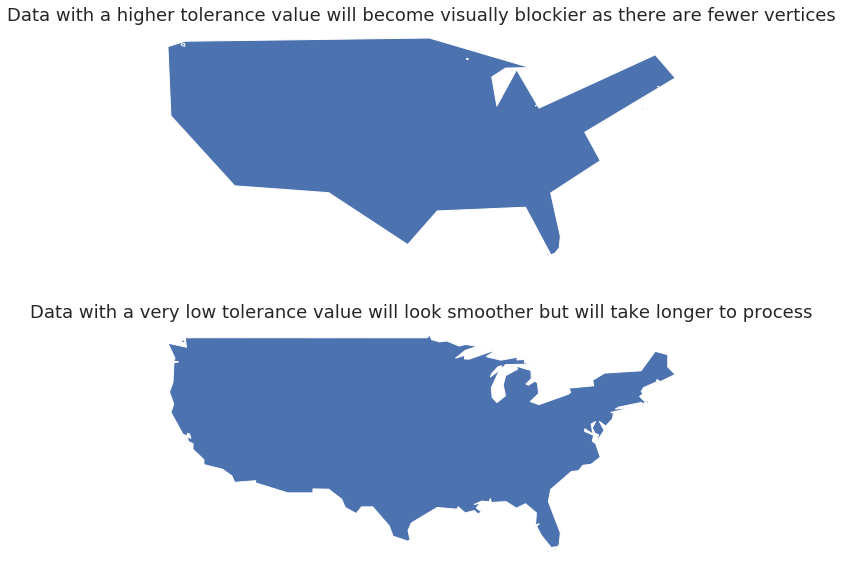

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Set a larger tolerance yields a blockier polygon
country_boundary_us.simplify(2, preserve_topology=True).plot(ax=ax1)

# Set  a larger tolerance yields a blockier polygon
country_boundary_us.simplify(.2, preserve_topology=True).plot(ax=ax2)

ax1.set_title(
    "Data with a higher tolerance value will become visually blockier as there are fewer vertices")
ax2.set_title(
    "Data with a very low tolerance value will look smoother but will take longer to process")

ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

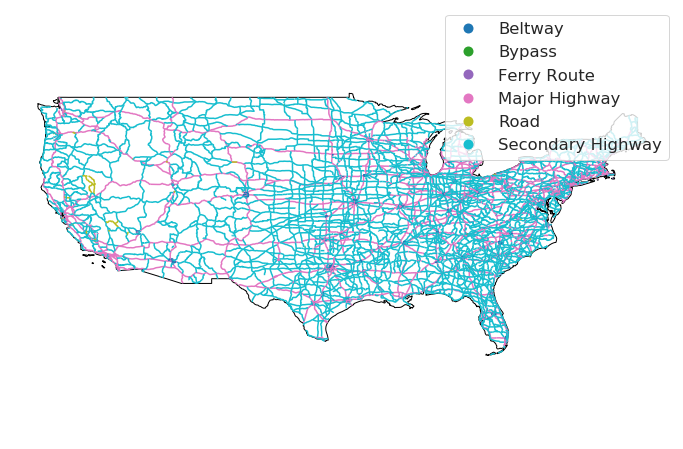

In [18]:
# Plot the data by attribute
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1, 
                         color="white", 
                         edgecolor="black", 
                         ax=ax)

ne_roads_clip.plot(ax=ax, 
                   column='type', 
                   legend=True)
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [19]:
# # plotting using geopandas
# road_colors = ['black', 'grey', 'grey', 'black', 'grey', 'grey' ]
# line_widths = [1, .5, .5, 1, .5,.5]
# # plot the data
# fig, ax = plt.subplots(figsize  = (12, 8))
# country_boundary_us.plot(alpha = 1, color="white",
#                          edgecolor = "black",
#                          ax = ax)
# us_roads_only.plot(ax=ax, column='type',
#                    cmap = ListedColormap(road_colors),
#                    linewidth = line_widths,
#                    legend = True)
# ax.set_axis_off()
# plt.axis('equal');

In [20]:
# # plotting using geopandas
# road_colors = ['black', 'grey', 'grey', 'black', 'grey', 'grey' ]
# line_widths = [1, .5, .5, 1, .5, .5]

# # plot the data
# fig, ax = plt.subplots(figsize  = (12, 8))
# country_boundary_us.plot(alpha = 1, color="white",
#                          edgecolor = "black",
#                          ax = ax)
# us_roads_only.plot(ax=ax, column='type',
#                    cmap = ListedColormap(road_colors),
#                    linewidth = line_widths)

# roads = [mlines.Line2D([0], [0], color=c, linewidth = width) for c, width in zip(road_colors, line_widths)]
# road_names = np.unique(us_roads_only['type'])

# ax.legend(roads, road_names, loc=(1, .5), prop={'size': 12})
# ax.set_axis_off()
# plt.axis('equal');

Below, you create a custom legend. There are many different approaches to this. One is below.

To begin you create a python dictionary for each attribute value in your legend. Below you will see each road type has a dictionary entry and two associated values - a color and a number representing the width of the line in your legend.

`'Beltway': ['black', 2]` Color the line for beltway black with a line width of 2.

Next you loop through the dictionary to plot the data. In the loop below, you select each attribute value, and plot it using the color and line width assigned in the dictionary above. 

```python
for ctype, data in ne_roads_clip.groupby('type'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              linewidth=road_attrs[ctype][1],
              ax=ax)
```
Finally, a call to `ax.legend()` renders the legend using the colors applied in the loop above.

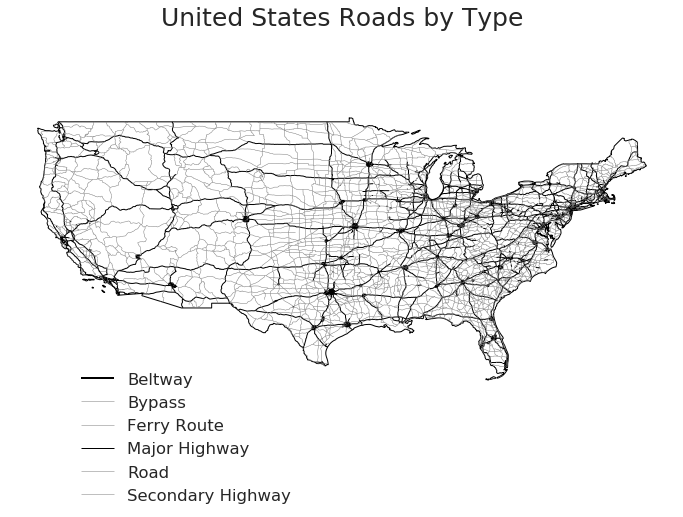

In [21]:
# Plot with a custom legend

# First, create a dictionary with the attributes of each legend item
road_attrs = {'Beltway': ['black', 2],
              'Secondary Highway': ['grey', .5],
              'Road': ['grey', .5],
              'Bypass': ['grey', .5],
              'Ferry Route': ['grey', .5],
              'Major Highway': ['black', 1]}

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

for ctype, data in ne_roads_clip.groupby('type'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              ax=ax,
              linewidth=road_attrs[ctype][1])

country_boundary_us.plot(alpha=1, color="white", edgecolor="black", ax=ax)

ax.legend(frameon=False, 
          loc = (0.1, -0.1))

ax.set_title("United States Roads by Type", fontsize=25)
ax.set_axis_off()

plt.axis('equal')
plt.show()

In [22]:
# Import the aoi data
sjer_aoi = gpd.read_file(
    'data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp')

# Import the roads data
sjer_roads = gpd.read_file(
    'data/spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp')

# Reproject the aoi to the roads
sjer_aoi_utm = sjer_aoi.to_crs(sjer_roads.crs)
sjer_aoi_utm.crs, sjer_roads.crs

# Clip the roads layer to the sjer extent object
intersected = sjer_roads.intersection(sjer_aoi_utm.unary_union)
valid = intersected.geometry.notnull()

# Subset the roads data to only roads with geometry values
sjer_roads.loc[valid].head()

clipped_roads = sjer_roads.loc[valid].set_geometry(intersected.geometry[valid])
# Clipped_roads.plot();

### Clip a Spatial Layer to Shapefile Extent in Python

Above you clipped a geometry to the exact geometry of another polygon object. You can also clip data to the overall spatial extent of the shapefile. Remember that the spatial extent represents the total geographic area (min x, min y, max x and max y) that the shapefile covers. This object is a rectangle or a box.


To clip the data to the total extent, you first need to create a clip box from the boundary of the spatial layer. In this case we are using the sjer_aoi layer. 

First extract the boundary values (xmin,xmax, ymin,ymax) from the sjer_aoi layer using the syntax:

`box(*country_boundary_us.total_bounds)`

Note that the `*` in the code above expands the x and y min and max values of the sjer_aoi spatial extent so that python can turn them into the extent for a box.

this code is the same as using

`xmin, xmax, ymin, ymax = country_boundary_us.total_bounds`

To create a clip boundary, you can use the same total_bounds attribute that you used above. however this time, you will create a spatial object - a box that you will use to clip the data. 

The example below crops the roads layer to a polygon. You can do this with geopandas.
You have to handle points separately. 

In [23]:
# View country boundary total bounds (the spatial extent of the layer)
country_boundary_us.total_bounds

# Create bounds object
bounds = box(*country_boundary_us.total_bounds)

You can be even more concise with your code too. Embed creating the box object with out intersection function


In [24]:
# ne_roads["geometry"] = ne_roads.geometry.intersection(box(*country_boundary_us.total_bounds))
# # finally plot the output using geopandas .plot
# fig, ax = plt.subplots(figsize=(10, 10))

# country_boundary_us.plot(alpha = 1,
#                          color="white",
#                          edgecolor = "black",
#                          ax = ax,
#                         linewidth=2)
# ne_roads.plot(ax=ax)
# ax.set_axis_off()
# plt.axis('equal');

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional Challenge: Crop, Reproject and Plot data

Create a map of your SJER study area as follows:

1. Import the `madera-county-roads/tl_2013_06039_roads.shp` layer located in your week4 data download.
2. Create a map that shows the roads layer, study site locations and the sjer_aoi boundary.
3. Add a **title** to your plot.
4. Add a **legend** to your plot that shows both the roads and the plot locations.
5. Plot the roads by road type and add each type to the legend. HINT: use the metadata included in your data download to figure out what each type of road represents ("C", "S", etc.). [Use the homework lesson on custom legends]({{ site.url }}/course-materials/earth-analytics/week-5/python-custom-legend/) to help build the legend.
6. BONUS: Plot the plots by type - adjust the symbology of the plot locations (choose a symbol using pch for each type and adjust the color of the points).
7. Do your best to make the map look nice!

IMPORTANT: be sure that all of the data are within the same EXTENT and crs of the sjer_aoi
layer. This means that you may have to CROP and reproject your data prior to plotting it!

Your map should look something like the map below. You should of course use the
actual roads types that you find in the metadata rather than "Road type 1, etc"

NOTE: this is also a plot you will submit as a part of your homework this week!

</div>

In [25]:
# # this is the answer to the challenge / homework
# # Import data
# sjer_aoi = gpd.read_file('data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp')
# sjer_roads = gpd.read_file('data/spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp')
# sjer_plots = gpd.read_file('data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp')

# # replace missing roads with "Unknown"
# sjer_roads = sjer_roads.replace({'RTTYP': {'': "Unknown"}})

# # reproject roads and plot data
# sjer_roads = sjer_roads.to_crs(sjer_aoi.crs)

# # crop the data
# sjer_roads["geometry"] = sjer_roads.geometry.intersection(box(*sjer_aoi.total_bounds))

# # create color dictionaries for points and lines
# roadPalette = {'M': 'black', 'S': 'blue', 'C': 'grey', 'Unknown': 'lightgrey'}
# pointsPalette = {'trees': 'chartreuse', 'grass': 'darkgreen', 'soil': 'burlywood'}

# # plot data
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_axis_off()

# # add the plot points
# for ctype, data in sjer_plots.groupby('plot_type'):
#     color = pointsPalette[ctype]
#     label = ctype
#     data.plot(color=color, ax=ax, label=label, markersize=50)

# # add roads
# for ctype, data in sjer_roads.groupby('RTTYP'):
#     color = roadPalette[ctype]
#     label = ctype
#     data.plot(color=color, ax=ax, label=label)

# # add title
# ax.set(title='Homework Plot 1: \nMadera County Roads and study plot locations')

# # ensure the legend is outside of the plot
# ax.legend(loc=(1.1, .1), fontsize=16, frameon=True)

# #set up legend
# points = ax.collections[:3]
# lines = ax.collections[3:]
# leg1 = ax.legend(points, [point.get_label() for point in points], loc=(1.1, .1),
#                  prop={'size': 16},
#                   frameon=False,
#                  title='Plot Type')
# leg2 = ax.legend(lines, [line.get_label() for line in lines],
#                  loc=(1.1, .3),
#                  prop={'size': 16},
#                 frameon=False,
#                  title='Road Type')
# ax.add_artist(leg1)
# plt.setp(leg2.get_title(), fontsize='15')
# plt.setp(leg1.get_title(), fontsize='15');